### Instruction - 1


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

In [42]:
lefthanded_data.head()

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906


In [43]:
lefthanded_data.describe

<bound method NDFrame.describe of     Age       Male     Female
0    10  12.717558  12.198041
1    11  15.318830  11.144804
2    12  14.808281  11.549240
3    13  13.793744  11.276442
4    14  15.156304  11.572906
..  ...        ...        ...
72   82   7.350204   4.874899
73   83   6.471204   5.672536
74   84   6.510858   5.774881
75   85   7.337968   7.051459
76   86   5.059387   4.680948

[77 rows x 3 columns]>

In [44]:
lefthanded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     77 non-null     int64  
 1   Male    77 non-null     float64
 2   Female  77 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [45]:
lefthanded_data.shape

(77, 3)

In [25]:
fig, ax = plt.subplots() 
ax.plot(lefthanded_data['Age'], lefthanded_data['Female'], label='Female', marker='o') 
ax.plot(lefthanded_data['Age'], lefthanded_data['Male'], label='Male', marker='x')
ax.legend() 
ax.set_xlabel('Age')
ax.set_ylabel('Left-Handedness Rate')
plt.show()

### Instruction - 2

In [46]:
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']

In [47]:
lefthanded_data['Birth_year']

0     1976
1     1975
2     1974
3     1973
4     1972
      ... 
72    1904
73    1903
74    1902
75    1901
76    1900
Name: Birth_year, Length: 77, dtype: int64

In [48]:
lefthanded_data['Mean_lh'] = (lefthanded_data['Male'] + lefthanded_data['Female']) / 2

In [49]:
lefthanded_data['Mean_lh'] 

0     12.457800
1     13.231817
2     13.178760
3     12.535093
4     13.364605
        ...    
72     6.112551
73     6.071870
74     6.142870
75     7.194713
76     4.870168
Name: Mean_lh, Length: 77, dtype: float64

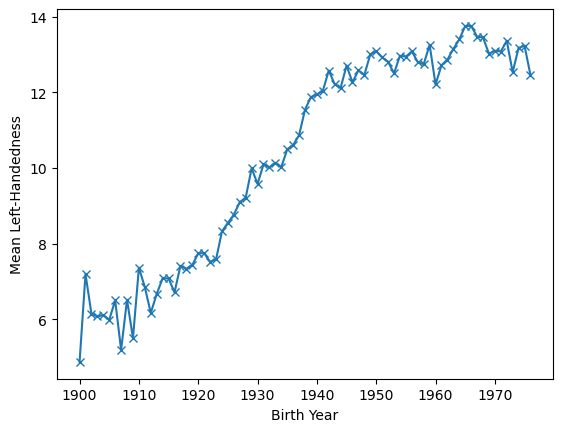

In [50]:
fig, ax = plt.subplots()
ax.plot(lefthanded_data['Birth_year'], lefthanded_data['Mean_lh'], marker='x') 
ax.set_xlabel('Birth Year')
ax.set_ylabel('Mean Left-Handedness')
plt.show()

### Instruction -3

In [51]:
import numpy as np

In [52]:
early_1900s_rate = lefthanded_data.tail(10)['Mean_lh'].mean()

In [53]:
early_1900s_rate

6.007158575049999

In [54]:
late_1900s_rate = lefthanded_data.head(10)['Mean_lh'].mean()

In [55]:
late_1900s_rate

13.09061452551

In [94]:
def P_lh_given_A(ages_of_death, study_year = 1990):
    """ P(Left-handed | ages of death), calculated based on the reported rates of left-handedness.
    Inputs: numpy array of ages of death, study_year
    Returns: probability of left-handedness given that subjects died in `study_year` at ages `ages_of_death` """
    
    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean() 
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10
    oldest_age = study_year - 1986 + 86 
    P_return = np.zeros(ages_of_death.shape)
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    return P_return

In [95]:
P_lh_given_A

<function __main__.P_lh_given_A(ages_of_death, study_year=1990)>

### Instruction - 4


In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"


In [98]:
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

In [99]:
death_distribution_data.head()

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0


In [100]:
death_distribution_data.describe

<bound method NDFrame.describe of      Age  Both Sexes     Male   Female
0      0     27937.0  15646.0  12291.0
1      1      1989.0   1103.0    886.0
2      2      1376.0    797.0    579.0
3      3      1046.0    601.0    445.0
4      4       838.0    474.0    364.0
..   ...         ...      ...      ...
120  120         1.0      NaN      1.0
121  121         NaN      NaN      NaN
122  122         NaN      NaN      NaN
123  123         NaN      NaN      NaN
124  124         NaN      NaN      NaN

[125 rows x 4 columns]>

In [101]:
death_distribution_data.shape

(125, 4)

In [102]:
death_distribution_data.dropna(subset=['Both Sexes'], inplace=True)

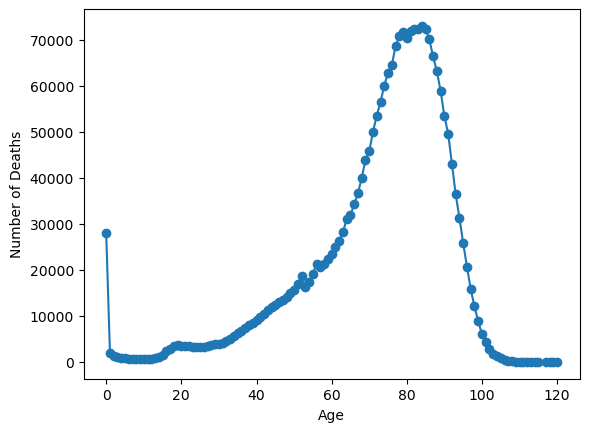

In [103]:
fig, ax = plt.subplots()
ax.plot(death_distribution_data['Age'], death_distribution_data['Both Sexes'], marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Deaths')
plt.show()

### Instruction - 5

In [104]:
def P_lh(death_distribution_data, study_year = 1990): 
    """ Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year) 
    p = np.sum(p_list)
    return p / np.sum(death_distribution_data['Both Sexes'])

In [105]:
print(P_lh(death_distribution_data))

0.07766387615350638


### Instruction - 6

In [120]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) 
    P_lh_A = P_lh_given_A(ages_of_death, study_year) 
    return P_lh_A*P_A/P_left


### Instruction - 7

In [121]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year) 
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year)
    return P_rh_A*P_A/P_right


### Instruction - 8

In [122]:
import numpy as np


In [123]:
ages = np.arange(6, 115, 1)

In [124]:
left_handed_probability = P_A_given_lh(ages, death_distribution_data)


In [125]:
left_handed_probability

6      0.000491
7      0.000481
8      0.000488
9      0.000451
10     0.000484
         ...   
110    0.000013
111    0.000007
112    0.000004
113    0.000003
114    0.000002
Name: Both Sexes, Length: 109, dtype: float64

In [126]:
right_handed_probability = P_A_given_rh(ages, death_distribution_data)


In [127]:
right_handed_probability

6      0.000274
7      0.000269
8      0.000273
9      0.000252
10     0.000271
         ...   
110    0.000017
111    0.000009
112    0.000005
113    0.000004
114    0.000003
Name: Both Sexes, Length: 109, dtype: float64

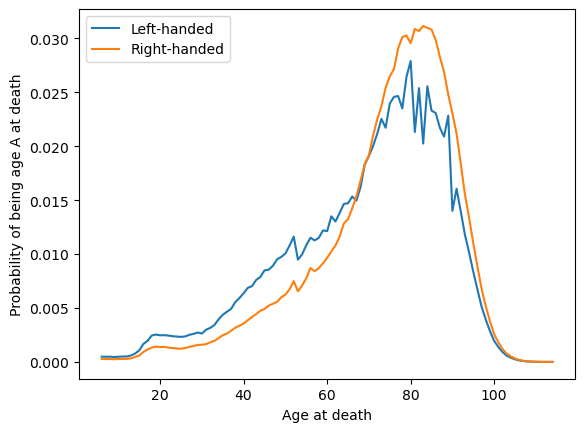

In [128]:
fig, ax = plt.subplots() 
ax.plot(ages, left_handed_probability, label="Left-handed")
ax.plot(ages, right_handed_probability, label="Right-handed")
ax.legend() 
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")
plt.show()

### Instruction - 9

In [129]:
average_lh_age = np.nansum(ages * np.array(left_handed_probability))

In [130]:
average_lh_age

67.24503662801027

In [131]:
average_rh_age = np.nansum(ages * np.array(right_handed_probability))

In [132]:
average_rh_age

72.79171936526477

In [133]:
print("Average age at death for left-handers:", round(average_lh_age, 2), "years")
print("Average age at death for right-handers:", round(average_rh_age, 2), "year")

Average age at death for left-handers: 67.25 years
Average age at death for right-handers: 72.79 year


In [137]:
print("The difference in average ages is: " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

The difference in average ages is: 5.5 years.


### Instruction - 10


In [138]:
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)

In [139]:
left_handed_probability_2018

6      0.000333
7      0.000327
8      0.000331
9      0.000306
10     0.000329
         ...   
110    0.000010
111    0.000004
112    0.000003
113    0.000002
114    0.000001
Name: Both Sexes, Length: 109, dtype: float64

In [140]:
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)

In [141]:
right_handed_probability_2018

6      0.000286
7      0.000280
8      0.000284
9      0.000263
10     0.000282
         ...   
110    0.000018
111    0.000009
112    0.000005
113    0.000004
114    0.000003
Name: Both Sexes, Length: 109, dtype: float64

In [142]:
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

In [143]:
print("The difference in average ages is " + str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 2.3 years.
